# Project 1
## Tyler Baker and Rathish Parayil Sasidharan

### Goal:

For your first project, you are asked to
Identify and load a network dataset that has some categorical information available for each node.
For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
Compare your centrality measures across your categorical groups.

### The data:

For this project we decided to use a network on crimes. In this network each node is either a person or a crime. Each person was either a suspect, a victim, a witness, or both a suspect and a victim. We found the data from http://konect.cc/networks/moreno_crime/

In [41]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
edgelist_data = pd.read_csv("https://raw.githubusercontent.com/ericmjl/Network-Analysis-Made-Simple/master/data/moreno_crime/out.moreno_crime_crime")
role_data = pd.read_csv("https://raw.githubusercontent.com/ericmjl/Network-Analysis-Made-Simple/master/data/moreno_crime/rel.moreno_crime_crime.person.role", header=None)
sex_data = pd.read_csv("https://raw.githubusercontent.com/ericmjl/Network-Analysis-Made-Simple/master/data/moreno_crime/ent.moreno_crime_crime.person.sex", header=None)

edgelist_data has an extra blank column, 2 rows that needed to be dropped, and the columns needed to be renamed.

In [20]:
edgelist_data = edgelist_data.iloc[1:,:]
edgelist_data = edgelist_data["% bip unweighted"].str.split(pat=' ', expand=True)
edgelist_data

,0,1
1,1,1
2,1,2
3,1,3
4,1,4
5,2,5
...,...,...
1472,825,399
1473,826,300
1474,827,265
1475,828,298


In [21]:
edgelist_data.columns= ["PersonID", "CrimeID"]
edgelist_data

,PersonID,CrimeID
1,1,1
2,1,2
3,1,3
4,1,4
5,2,5
...,...,...
1472,825,399
1473,826,300
1474,827,265
1475,828,298


role_data needs a column named.

In [22]:
role_data.columns = ["roles"]

sex_data needs a column named.

In [23]:
sex_data.columns = ["gender"]

### Creating our graph
Now that the daata is ready to go, we can start building our graph.

In [24]:
G = nx.Graph()

First we need to combine the edgelist_data with the role data. Then we can create nodes, some nodes will be people, and others will be crimes. Each edge will represent a role that a person had with a crime.

In [26]:
for r, d in edgelist_data.join(role_data).iterrows():
    pid = 'P{0}'.format(d['PersonID'])  # pid = "Person I.D."
    cid = 'C{0}'.format(d['CrimeID'])  # cid = "Crime I.D."
    G.add_node(pid, bipartite='person')
    G.add_node(cid, bipartite='crime')
    G.add_edge(pid, cid, role=d['roles'])

Now we need to add a gender attribute to the people nodes.

In [28]:
for idx in sex_data.index:
    nodeid = 'P{0}'.format(idx+1)
    G.nodes[nodeid]['gender'] = sex_data.loc[idx]["gender"]

Let us make sure that our graph is bipartite.

In [29]:
nx.bipartite.is_bipartite(G)

True

Now we want to get an initial visualization of the graph.

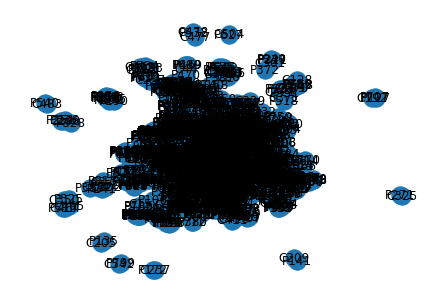

In [30]:
nx.draw(G, with_labels = True)
plt.show()

### Centrality Metrics
We have to find the degree and eigen centrality for all the people nodes, and all crime nodes. Then we need to compare the metrics between men and women.

In [34]:
nx.degree_centrality(G)

{'P1': 0.0029006526468455403,
 'C1': 0.0014503263234227702,
 'C2': 0.0014503263234227702,
 'C3': 0.0014503263234227702,
 'C4': 0.0014503263234227702,
 'P2': 0.01595358955765047,
 'C5': 0.0014503263234227702,
 'C6': 0.002175489485134155,
 'C7': 0.0007251631617113851,
 'C8': 0.0014503263234227702,
 'C9': 0.0007251631617113851,
 'C10': 0.0014503263234227702,
 'C11': 0.0029006526468455403,
 'C12': 0.0014503263234227702,
 'C13': 0.002175489485134155,
 'C14': 0.009427121102248005,
 'C15': 0.0014503263234227702,
 'C16': 0.0014503263234227702,
 'C17': 0.0014503263234227702,
 'C18': 0.0007251631617113851,
 'C19': 0.005801305293691081,
 'C20': 0.002175489485134155,
 'C21': 0.0014503263234227702,
 'C22': 0.0036258158085569255,
 'C23': 0.0036258158085569255,
 'C24': 0.005801305293691081,
 'C25': 0.0014503263234227702,
 'C26': 0.0029006526468455403,
 'P3': 0.0007251631617113851,
 'C27': 0.0014503263234227702,
 'P4': 0.0007251631617113851,
 'P5': 0.0007251631617113851,
 'P6': 0.0007251631617113851,


This returned the degree centrality for all nodes, but that is not what we really want. We want to seperate the nodes, then find the cenrality metrics.

In [55]:
person_nodes = [node for node in G.nodes() if G.nodes[node]['bipartite'] == 'person']
crime_nodes = [node for node in G.nodes() if G.nodes[node]['bipartite'] == 'crime']

We have now seperated the nodes into their respective groups.

In [59]:
person_deg_cen = [node for node in bipartite.degree_centrality(G, person_nodes).items() if node[0].startswith("P")]
sorted(person_deg_cen, key=lambda x: x[1], reverse=True)[:10]

[('P815', 0.045372050816696916),
 ('P2', 0.039927404718693285),
 ('P425', 0.032667876588021776),
 ('P220', 0.0308529945553539),
 ('P56', 0.025408348457350273),
 ('P715', 0.021778584392014518),
 ('P356', 0.019963702359346643),
 ('P514', 0.019963702359346643),
 ('P695', 0.019963702359346643),
 ('P531', 0.018148820326678763)]

Great, we have now found the top 10 people nodes with the highest degree centrality. This can be interpretted as these 10 people have the most connections to crime. 

Now we are going to do the same for the crime nodes.

In [60]:
crime_deg_cen = [node for node in bipartite.degree_centrality(G, crime_nodes).items() if node[0].startswith("C")]
sorted(crime_deg_cen, key=lambda x: x[1], reverse=True)[:10]

[('C110', 0.02171290711700844),
 ('C153', 0.0180940892641737),
 ('C14', 0.015681544028950542),
 ('C43', 0.015681544028950542),
 ('C95', 0.015681544028950542),
 ('C39', 0.01447527141133896),
 ('C161', 0.013268998793727381),
 ('C36', 0.01085645355850422),
 ('C78', 0.01085645355850422),
 ('C187', 0.01085645355850422)]

We now have found the top 10 highest degree centrality metric for crime nodes. This is interpretted crimes that involved a lot of people.

Eigenvector centrality can only be for the whole graph, G because as a bipartite graph a person node can never connect to another person node. The same holds true for the crime nodes.

In [62]:
eigen_cen = nx.eigenvector_centrality(G)
eigen_cen

{'P1': 6.694236555176402e-07,
 'C1': 1.3372655310293953e-07,
 'C2': 1.3372655310293953e-07,
 'C3': 1.3372655310293953e-07,
 'C4': 3.0804903087482625e-06,
 'P2': 0.01742722281705612,
 'C5': 0.0032369054653200243,
 'C6': 0.0033488339549793368,
 'C7': 0.0031322284411311988,
 'C8': 0.0033488339549793368,
 'C9': 0.0031322284411311988,
 'C10': 0.0033488339549793368,
 'C11': 0.003468796237619927,
 'C12': 0.0036021751580565275,
 'C13': 0.0033488339549793368,
 'C14': 0.014667813548355045,
 'C15': 0.0036021751580565275,
 'C16': 0.0036021751580565275,
 'C17': 0.0032369054653200243,
 'C18': 0.0031322284411311988,
 'C19': 0.004658859773509243,
 'C20': 0.003722587707970778,
 'C21': 0.010961463966603174,
 'C22': 0.0035976917105505846,
 'C23': 0.004594475693113601,
 'C24': 0.004054934873812228,
 'C25': 0.0037247317888967606,
 'C26': 0.003468796237619927,
 'P3': 0.00024089384793716658,
 'C27': 0.0013457568601080811,
 'P4': 0.0007292156188445711,
 'P5': 0.0008376067110897843,
 'P6': 0.008195581254883873

In [66]:
sorted(eigen_cen, key=lambda x: x[1], reverse=True)[:20]

['C9',
 'P9',
 'C90',
 'C91',
 'C92',
 'C93',
 'C94',
 'C95',
 'C96',
 'C97',
 'C98',
 'C99',
 'P90',
 'P91',
 'P92',
 'P93',
 'P94',
 'P95',
 'P96',
 'P97']

So P9, P90, P91, P92, P93 are people that are connected to large crimes. 

video here: https://youtu.be/TE-RRClzmh0